# Proyeksi Pembangunan PLTS Atap di Gedung ITERA Sebagai *Leading Innovation in University*

Kelompok 3 :
1. Meysi Supmawati (120160016)
2. Lusi Aulia Jati (119160090)
3. Meryvita Karla Anju Lingga (120160004)
4. Piar Meinanda (120160045)
5. Lia Febriani (120160075)

# Permasalahan

- Adanya perencanaan penambahan PLTS di Itera dengan lahan yang sudah ada yakni PLTS Terapung dan PLTS Atap.
- PLTS terapung merupakan PLTS rencananya akan dibangun di embung yang berada di ITERA. Adapun rencana pembangunan PLTS terapung ini dilakukan karena tidak membutuhkan lahan khusus (lahan di darat) mengingat ITERA masih dalam tahap pembangunan dan lahan yang tersisa sudah direncanakan untuk proses pembangunan gedung perkuliahan. Namun, rencana tersebut ternyata memiliki dampak negatif yang lebih banyak untuk ITERA. Seperti, invertasi yang mahal dan tidak sebanding dengan modal yang dikeluarkan, proses instalasi yang rumit, serta sulitnya mendapatkan panas secara maksimal karna terkena pengaruh dari panel yang terapung di dalam air.
- Sedangkan, untuk PLTS atap sangat mungkin dilakukan di ITERA mengingat tidak memerlukan lahan khusus, proses instalasinya lebih mudah,serta mampu mendapatkan panas secara maksimal tanpa ada hambatan apapun karna panel berada di atas atap gedung.

# Variabel dan Data

Variabel sekaligus yang menjadi data dalam penelitian pemodelan kami adalah variabel luasan atap dan variabel produksi listrik PLTS.

In [ ]:
#Library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics

In [ ]:
# Clone data PLTS dari github
!git clone https://github.com/lusiaulia/Pemodelan_PLTS.git

fatal: destination path 'Pemodelan_PLTS' already exists and is not an empty directory.


In [ ]:
data_produksi_PLTS = pd.read_excel("/content/Pemodelan_PLTS/Data/plts bulanan.xlsx")
data_luas = pd.read_excel("/content/Pemodelan_PLTS/Data/plts luasan.xlsx")

In [ ]:
#Tampilan Data Produksi PLTS
data_produksi_PLTS

,BULAN,KW
0,FEBRUARI,319.674993
1,MARET,251.985807
2,APRIL,283.662179
3,MEI,259.821469
4,JUNI,277.406855
5,JULI,326.205883
6,AGUSTUS,334.636103
7,SEPTEMBER,207.139111
8,OKTOBER,229.337441
9,NOVEMBER,345.105503


In [ ]:
#Tampilan Data Produksi PLTS
luas = data_luas[1:]
luas

,gedung,luas
1,C,543
2,D,427
3,E,998
4,F,1071
5,Ozt,1224
6,labtek 1,840
7,labtek 2,1008
8,labtek 3,1120
9,GKU,1560


## Data Produksi Listrik

<Axes: title={'center': 'Produksi Listrik PLTS ITERA'}, xlabel='BULAN'>

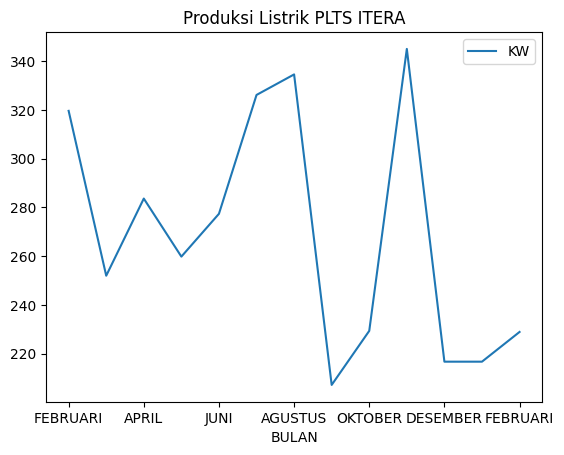

In [ ]:
#Visualisasi Data produksi Listrik
df_produksi_PLTS= data_produksi_PLTS.set_index('BULAN')
df_produksi_PLTS.plot(title='Produksi Listrik PLTS ITERA')

In [ ]:
df_produksi_PLTS.describe()

,KW
count,13.000000
mean,269.018194
std,49.229341
min,207.139111
25%,228.892007
50%,259.821469
75%,319.674993
max,345.105503


Dari deskripsi data produksi bulanan listrik PLTS pada februari 2022 hingga februari 2023 diperoleh atap gedung-gedung PLTS diperoleh nilai rata-rata bulanan sebesar 269.018194 KW, nilai maksimum sebesar 345.105503 pada bulan November 2022, serta nilai produksi minimum sebesar 207.139111 KW pada bulan September 2022.

## Data Luasan Atap Tiap Gedung

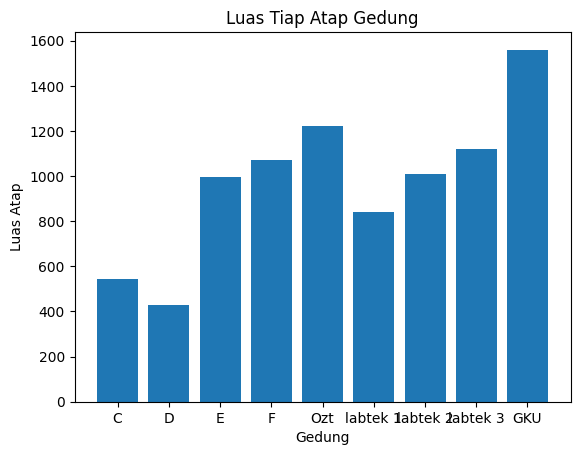

In [ ]:
import matplotlib.pyplot as plt

gedung = luas['gedung']
lss = luas['luas']

plt.title('Luas Tiap Atap Gedung')
plt.bar(gedung, lss)
plt.xlabel('Gedung')
plt.ylabel('Luas Atap')
plt.show()

In [ ]:
luas.describe()

,luas
count,9.000000
mean,976.777778
std,343.003199
min,427.000000
25%,840.000000
50%,1008.000000
75%,1120.000000
max,1560.000000


Dari deskripsi data luasan atap gedung-gedung PLTS diperoleh nilai rata-rata 976.77 meter persegi, luasan terbesar 1560 meter persegi yaitu gedung GKU dan luasan terkecil yaitu 427 meter persegi yaitu gedung D.

## Perhitungan


Dari data luasan dan data produksi listrik PLTS ITERA, dengan menggunakan perbandingan senilai sebagai berikut


  $p\_a$ = $\frac{ls}{ls\_t}.{rt}$


Ket :

$p\_a$ = produksi listrik atap gedung


$ls$ = luas atap gedung ITERA

$ls\_t$ = luas total PLTS

$rt$ = rata-rata produksi PLTS bulanan

Dapat juga diperoleh persentase terhadap produksi PLTS utama, dengan rumus

$\frac{p\_a}{rt}.{100\%}$


In [ ]:
#Definisikan Variabel
ls_t = data_luas.luas[0]
rt = df_produksi_PLTS.mean()
ls = luas

#Kolom Baru Yang Akan diisi
ls['p_a'] = ls.luas
ls['persen'] = ls.luas

<ipython-input-59-202d22c9afda>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls['p_a'] = ls.luas
<ipython-input-59-202d22c9afda>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls['persen'] = ls.luas


In [ ]:
#Mengisi Kolom p_a
for i in range(0,len(ls)):
  x = (ls['luas'].iloc[i]/ls_t)*rt
  ls['p_a'].iloc[i] = x

<ipython-input-60-84674b393059>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls['p_a'].iloc[i] = x


In [ ]:
#Mengisi Kolom Persentase
for i in range(0,len(ls)):
  x = (ls['p_a'].iloc[i]/rt)*100
  ls['persen'].iloc[i] = x

<ipython-input-61-d2015bc9c5ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ls['persen'].iloc[i] = x


In [ ]:
ls

,gedung,luas,p_a,persen
1,C,543,14.607688,5.43
2,D,427,11.487077,4.27
3,E,998,26.848016,9.98
4,F,1071,28.811849,10.71
5,Ozt,1224,32.927827,12.24
6,labtek 1,840,22.597528,8.40
7,labtek 2,1008,27.117034,10.08
8,labtek 3,1120,30.130038,11.20
9,GKU,1560,41.966838,15.60


In [ ]:
#Total Listrik Yang Dihasilkan
print("Total listrik yang dihasilkan PLTS atap : ", ls.p_a.sum())
#Total Persentase
print("Total Persentase terhadap PLTS : " , ls.persen.sum())

Total listrik yang dihasilkan PLTS atap :  236.49389454179206
Total Persentase terhadap PLTS :  87.91


Dari hasil yang diperoleh bahwa dengan diadakannya skenario PLTS atap akan menghasilkan energi listrik sebesar 87.91% PLTS yang sudah ada saat ini. Dengan demikian, sungguh langkah yang baik jika dimasa mendatang dapat dilakukan skenario PLTS atap ini dikarenakan juga dapat menghemat pengeluaran kebutuhan listrik serta memanfaatkan atap sehingga tidak memakai lahan yang lain lagi.


<!-- Dengan perhitungan yang telah dilakukan rencana selanjutnya adalah  
Pengerucutan batasan masalah yaitu memilih kelayakan atap gedung dari berbagai aspek untuk bisa dipasang PLTS atap. -->